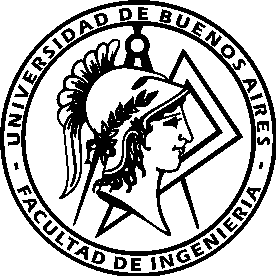

# Análisis Numérico (75.12/95.04) : Trabajo Práctico 1 - Búsqueda de Raíces
## Curso: Sassano

### Integrantes:
- **Valfre Franco** (105607)
- **Domínguez Santiago** (110010)
- **Aroa Alexia** (110014)

##Objetivos
El objetivo principal de este trabajo práctico es profundizar y analizar los métodos estudiados en clase para encontrar raíces. Para lograrlo, se implementaron en Python cada uno de estos, se realizaron pruebas para verificar su funcionamiento y se analizaron "casos límite" en los que pueden fallar. Además, se generaron gráficos para estudiar los resultados en función del orden de convergencia *P*, la constante asintótica *λ* y *log10(Δx)*.


# Preparar Entorno

In [ ]:
import numpy as np
from sympy import symbols, diff, exp
import matplotlib.pyplot as plt

#Bisección

Este método consiste en generar subintervalos en base al intervalo [a, b] y va detectando en cuál de esos subintervalos se encuentra la raíz.

In [ ]:
def encontrar_raiz_con_metodo_biseccion(un_extremo, otro_extremo, funcion, tolerancia, max_iteraciones):
    if tolerancia < 0:
        raise ValueError("La tolerancia debe ser positiva.")
    if funcion.subs(x, un_extremo) * funcion.subs(x, otro_extremo) > 0:
        raise ValueError("La función debe tener signos opuestos en los extremos del intervalo.")
    historial_xi = np.zeros((max_iteraciones, 2))
    i = 0
    while (np.abs(otro_extremo - un_extremo) > tolerancia) and (i <= max_iteraciones):
        c = (un_extremo + otro_extremo) / 2
        if funcion.subs(x,c) == 0 or abs(un_extremo - c) < tolerancia:
            historial_xi[i] = (i, c)
            return historial_xi[:i+1]
        if funcion.subs(x, un_extremo) * funcion.subs(x, c) < 0:
            otro_extremo = c
        else:
            un_extremo = c
        i += 1
        historial_xi[i] = (i, c)
    return historial_xi

# Punto Fijo

Este método intenta buscar la raíz de una función moviendo el problema de intersecar el eje $x$ a buscar un punto fijo de una función $ g(x) = x - ψ(x)f(x) $, donde de existir y ser único coincide con la raíz buscada de la función $ f(x) $.

In [ ]:
def encontrar_raiz_con_metodo_punto_fijo(x_inicial, g, tolerancia, max_iteraciones):
    historial_xi = np.zeros((max_iteraciones, 2))
    i = 1
    while i < max_iteraciones:
        x_proximo = g.subs(x, x_inicial).evalf()
        historial_xi[i] = ([i, x_proximo])
        if abs(x_proximo - x_inicial) < tolerancia:
            return historial_xi[1:i+1]
        x_inicial = x_proximo
        i += 1
    return historial_xi

# Secante
En este método se busca evitar la derivada; en su lugar, se aproxima la pendiente a la recta que pasa por el punto de estudio de la iteración actual y anterior.

In [ ]:
def encontrar_raiz_con_metodo_secante(semilla_uno, semilla_dos, funcion, tolerancia, max_iteraciones):
    i = 0
    historial_xi = np.zeros((max_iteraciones+1, 2))
    while i < max_iteraciones:
      x_proximo = semilla_dos - funcion.subs(x, semilla_dos) * (semilla_dos - semilla_uno) / (funcion.subs(x, semilla_dos) - funcion.subs(x, semilla_uno))
      if abs(x_proximo - semilla_dos) < tolerancia:
          historial_xi[i] = (i, x_proximo)
          return historial_xi[:i+1]
      semilla_uno, semilla_dos = semilla_dos, x_proximo
      i += 1
      historial_xi[i] = (i, x_proximo)
    return historial_xi


# Newton-Raphson
Es un caso particular de punto fijo donde se utiliza la derivada de la función para lograr una convergencia cuadrática

In [ ]:
def encontrar_raiz_con_metodo_newton_raphson(semilla, tolerancia, max_iteraciones, funcion):
    x_i = semilla
    i = 1
    cerca_cero = 1e-10 # El número depende de la arquitectura
    historial_xi = np.zeros((max_iteraciones, 2))
    historial_xi[0] = (0, x_i)
    funcion_derivada = diff(funcion, x)
    while i < max_iteraciones:
        if np.abs(funcion_derivada.subs(x, x_i)) < cerca_cero:
            return [["error_al_dividir_cerca_de_cero", f"Derivada se anula en la iteracion {i}"]]
        x_proximo = x_i - funcion.subs(x, x_i) / funcion_derivada.subs(x, x_i)
        historial_xi[i] = (i, x_proximo)
        if np.abs(x_proximo - x_i) < tolerancia:
            historial_xi = historial_xi[1:i + 1]
            return historial_xi
        i += 1
        x_i = x_proximo
    print(f"El método falló despues de las {max_iteraciones} iteraciones. No converge.")
    return historial_xi

# Newton-Raphson modificado
Este método nace de una limitación del método anterior en raices múltiples, dado que en estos casos Newton-Raphson pierde su convergencia cuadrática, este método busca recuperarla.

In [ ]:
def encontrar_raiz_con_metodo_newton_raphson_modificado(semilla, tolerancia, max_iteraciones, funcion):
    x_i = semilla
    i = 1
    historial_xi = np.zeros((max_iteraciones, 2))
    historial_xi[0] = (0, x_i)
    derivada = diff(funcion,x)
    derivada_segunda = diff(derivada, x)
    cerca_cero = 1e-10
    while i <= max_iteraciones:
        if (derivada.subs(x,x_i)**2 - (funcion.subs(x, x_i) * derivada_segunda.subs(x,x_i))) <= cerca_cero:
            return [["error_al_dividir_cerca_de_cero", f"Derivada se anula en la iteracion {i}"]]
        x_proximo = x_i - (funcion.subs(x, x_i)* derivada.subs(x,x_i)) / (derivada.subs(x,x_i)**2 - (funcion.subs(x, x_i) * derivada_segunda.subs(x,x_i)))
        historial_xi[i] = (i, x_proximo)
        if np.abs(x_proximo - x_i) < tolerancia:
            historial_xi = historial_xi[1:i + 1]
            return historial_xi
        i += 1
        x_i = x_proximo
    print(f"El método falló despues de las {max_iteraciones} iteraciones. No converge.")
    return historial_xi

# Calcular Orden De Convergencia

Para calcular el orden de convergencia primero se parte de la definición del orden de convergencia.

\begin{align}
  \large\lim_{n\to\infty}\frac{|x_{n+1} - r|}{|x_{n} - r|^p} = λ
  \end{align}

Dado que es muy complicado calcular ese límite, se opta por usar una fórmula más sencilla para calcular la constante asintótica que, por lo visto en clase, sale de hacer varias sustituciones y "romper" el límite.

\begin{align}
  \large λ = \frac{|x_{n-1} - x_{n}|}{|x_{n-2} - x_{n-1}|^{p}}
  \end{align}

Como no conocemos ni $ p $ ni $ λ $, es necesario utilizar el cálculo de la constante asintótica de la iteración anterior.

\begin{align}
  \large λ = \frac{|x_{n-2} - x_{n-1}|}{|x_{n-3} - x_{n-2}|^{p}}
  \end{align}

Igualando ambas fórmulas y con varios despejes se llega a la función utilizada:

\begin{align}
  \large p = \frac{log_{10}|\frac{x_{n-2} - x_{n-1}}{x_{n-1} - x_{n}}|}{log_{10}|\frac{x_{n-3} - x_{n-2}}{x_{n-2} - x_{n-1}}|}
  \end{align}



In [ ]:
def calcularOrdenDeConvergencia(historial):
    ordenes = []
    for iteracion, raiz in historial:
      if iteracion < 3:
        continue
      indice = int(iteracion - 1)
      numerador = np.log10(np.abs((historial[indice-2][1] - historial[indice-1][1]) / (historial[indice-1][1] - historial[indice][1])))
      denominador = np.log10(np.abs((historial[indice-3][1] - historial[indice-2][1]) / (historial[indice-2][1] - historial[indice-1][1])))
      ordenes.append(numerador / denominador)
    return ordenes

#Calcular Constante Asintótica

Para esto se utiliza la fórmula despejada con los ordendes de convergencia $ p $ calculados por cada iteración:

\begin{align}
  \large λ = \frac{|x_{n-1} - x_{n}|}{|x_{n-2} - x_{n-1}|^{p}}
  \end{align}


In [ ]:
def calcularConstanteAsintotica(historial, ordenDeConvergencia):
    ctes_asintoticas = []
    index_oc = 0
    for iteracion, raiz in historial:
        if iteracion < 3:
            continue
        indice = int(iteracion - 1)
        numerador = abs(historial[indice-1][1] - historial[indice][1])
        denominador = abs(historial[indice-2][1] - historial[indice-1][1])
        ctes_asintoticas.append(numerador / (denominador**ordenDeConvergencia[index_oc]))
        index_oc += 1
    return ctes_asintoticas


# Calcular Δx

Este es un cálculo más sencillo que los anteriores, es el error entre dos iteraciones sucesivas:
\begin{align}
  \large log_{10}|Δx| = log_{10}|x_{n} - x_{n-1}|
  \end{align}


In [ ]:
def calcular_delta_x(historial):
    res = []
    for i in range(len(historial)-1):
        error = abs(historial[i][1]- historial[i+1][1])
        res.append(np.log10(error))
    return res

#Imprimir Resultado

In [ ]:
def imprimir_resultado(caso, historia, tolerancia, raiz_exacta):
    print(f"{caso}:")
    if historia[0][0] == "error_al_dividir_cerca_de_cero":
        print(historia[0][1], "\n")
        return
    if (np.abs(historia[len(historia)-1][1] - raiz_exacta ) < tolerancia):
        print(f"El metodo encontró la raíz {historia[-1][1]} con un error <=", tolerancia, "en", len(historia), "iteraciones.\n" )
    else:
        print("El metodo no funciona correctamente\nRaiz exacta:", raiz_exacta, "\nRaiz encontrada por la función:", historia[len(historia)-1][1],"\n")

# Casos en los que funcionan los metodos



Todos estos casos están utilizando la misma función
\begin{align}
  \large f(x) = 3x^2-7x+2
  \end{align}
y buscando la misma raíz $ x = 0.\overline3 $ con una tolerancia de $ 10^{-5} $

Para punto fijo se utiliza
\begin{align}
  \large g(x) = \frac{3x^2 + 2}{7}
  \end{align}
que cumple con las condiciones de existencia y unicidad del punto fijo.

Las semillas fueron elegidas acorde a cada método para lograr una cantidad razonable de iteraciones para luego utilizarlas a la hora de crear los gráficos del orden de convergencia, constante asintótica y Δx.

In [ ]:
x = symbols('x')
funcion = 3*x**2 - 7*x + 2
raiz_exacta = 0.33333333333333333333333
funcion_g_punto_fijo =  (3*x**2+ 2)/7
tolerancia= 1e-5
max_iteraciones=250

limite_izq_biseccion = 0
limite_der_biseccion = 0.4
semilla_puntoFijo = -1

semilla_uno_secante = -3.5
semilla_dos_secante = -2.1

semilla_nr = -5
semilla_nrm = 0.88888888888899998

historia_biseccion = encontrar_raiz_con_metodo_biseccion(limite_izq_biseccion, limite_der_biseccion, funcion, tolerancia, max_iteraciones)
historia_puntofijo = encontrar_raiz_con_metodo_punto_fijo(semilla_puntoFijo, funcion_g_punto_fijo, tolerancia, max_iteraciones)
historia_secante = encontrar_raiz_con_metodo_secante(semilla_uno_secante, semilla_dos_secante, funcion, tolerancia, max_iteraciones)
historia_newton_raphson = encontrar_raiz_con_metodo_newton_raphson(semilla_nr, tolerancia, max_iteraciones, funcion)
historia_newton_raphson_modificado = encontrar_raiz_con_metodo_newton_raphson_modificado(semilla_nrm, tolerancia, max_iteraciones, funcion)

def funciona_biseccion():
    imprimir_resultado("CASO BISECCION", historia_biseccion, tolerancia, raiz_exacta)


def funciona_punto_fijo():
    imprimir_resultado("CASO PUNTO FIJO", historia_puntofijo, tolerancia, raiz_exacta)


def funciona_metodo_secante():
    imprimir_resultado("CASO METODO SECANTE", historia_secante, tolerancia, raiz_exacta)


def funciona_newton_raphson():
    imprimir_resultado("CASO NEWTON RAPHSON", historia_newton_raphson, tolerancia, raiz_exacta)


def funciona_newton_raphson_modificado():
    imprimir_resultado("CASO NEWTON RAPHSON MODIFICADO", historia_newton_raphson_modificado, tolerancia, raiz_exacta)

funciona_biseccion()
funciona_punto_fijo()
funciona_metodo_secante()
funciona_newton_raphson()
funciona_newton_raphson_modificado()



CASO BISECCION:
El metodo encontró la raíz 0.33333129882812507 con un error <= 1e-05 en 16 iteraciones

CASO PUNTO FIJO:
El metodo encontró la raíz 0.3333364333955585 con un error <= 1e-05 en 11 iteraciones

CASO METODO SECANTE:
El metodo encontró la raíz 0.3333333333165242 con un error <= 1e-05 en 8 iteraciones

CASO NEWTON RAPHSON:
El metodo encontró la raíz 0.33333333333333204 con un error <= 1e-05 en 7 iteraciones

CASO NEWTON RAPHSON MODIFICADO:
El metodo encontró la raíz 0.33333333333333337 con un error <= 1e-05 en 6 iteraciones



# Casos en los que NO funcionan los métodos

## Bisección
Para este caso se usa la función

\begin{align}
  \large f(x) = x^{2} - x^{3}
  \end{align}

que tiene una raíz en $ x = 0 $ y otra en $ x = 1 $, la primera raíz es el problema, dado que no debería ser detectada por el método porque no hay cambio de signo a ambos lados de la raíz, solo pasa en la cercanías de la segunda raíz.

Si usamos como limites del intervalo -2 y 2, la primer iteración encontraría la raíz $ x=0 $, ya que evaluaría $ f(0) = 0 $ y terminaría la ejecución del algoritmo.

## Punto fijo
Para este método, buscamos la raíz de la función

\begin{align}
\large f(x) = \frac{e^x}{10} + \frac{x}{5}
\end{align}

utilizando la siguiente función continua, en particular, $C[-3, 0.5]$ y admisible

\begin{align}
\large g(x) = \frac{-e^x}{2}
\end{align}

si le asignamos una semilla $x_0 = -2 $ notamos que a partir de la iteración 13, la diferencia entre las raíces alcanzó la tolerancia deseada pero convergiendo a una raíz incorrecta ($x ≈ -0.16$ en vez de la obtenida por una calculadora gráfica $x≈-0.35$) .


## Secante

En este caso, la función
\begin{align}
  \large f(x)=-2x^2 + x^3 - 0.1
  \end{align}

tiene un máximo local en $x=0$ y una raíz en aproximadamente $ x=2.05 $, y al colocar las semillas, por ejemplo, en $x_1 = -0.4 $ y $x_2 = -0.2$, el método converge pero muy lentamente, recién encuentra la raíz buscada en aproximadamente 270 iteraciones, que es una cantidad enorme para un método que suele tener un orden de convergencia no lineal.

## Newton-Raphson y Newton-Raphson modificado

Si a la función

\begin{align}
  \large f(x)=-x^{2} + x^{3} + 1
  \end{align}

que tiene una raíz en aproximadamente $ x=-0.75 $ y un mínimo local en aproximadamente $ x=0.6666 $ le asignamos una semilla inicial que esté cerca de dicho mínimo, como puede ser $ x_{0} = 1 $, el método no se ejecuta correctamente porque encuentra un punto donde la derivada se hace 0.

In [ ]:
x = symbols('x')
funcion_biseccion = x**2 - x**3

tolerancia = 1e-9
max_iteraciones = 250
semilla = 0.1
raiz_exacta = 1
limite_izq_biseccion = -10
limite_der_biseccion = 10

def no_funciona_biseccion():
    historia = encontrar_raiz_con_metodo_biseccion(limite_izq_biseccion, limite_der_biseccion, funcion_biseccion, tolerancia, max_iteraciones)
    imprimir_resultado("CASO BISECCIÓN", historia, tolerancia, raiz_exacta)

funcion_f = exp(x) * 0.1 + x * 0.2
funcion_puntofijo_g = exp(x) * -0.2
semilla_puntoFijo = -2
raiz_exacta_f = -0.3517337145434

def no_funciona_punto_fijo():
    historia = encontrar_raiz_con_metodo_punto_fijo(semilla_puntoFijo, funcion_puntofijo_g, tolerancia, max_iteraciones)
    imprimir_resultado("CASO PUNTO FIJO", historia, tolerancia, raiz_exacta_f)


funcion_secante = -2*x**2 + x**3 - 0.1
raiz_exacta_secante = 2.0244009609782
semilla_uno_secante_err = -0.4
semilla_dos_secante_err = -0.2

def no_funciona_secante():
    historia = encontrar_raiz_con_metodo_secante(semilla_uno_secante_err, semilla_dos_secante_err, funcion_secante, tolerancia, max_iteraciones)
    imprimir_resultado("CASO SECANTE", historia, tolerancia, raiz_exacta_secante)

funcion_nr = -1*x**2 + x**3 + 1
semilla_nr = 1
max_iteraciones_nr = 250
raiz_exacta_nr = -0.7548776662467
tolerancia_nr = 1

def no_funciona_newton_raphson():
    historia = encontrar_raiz_con_metodo_newton_raphson(semilla_nr, tolerancia, max_iteraciones_nr, funcion_nr)
    imprimir_resultado("CASO NEWTON RAPHSON", historia, tolerancia, raiz_exacta_nr)

def no_funciona_newton_raphson_modificado():
    historia = encontrar_raiz_con_metodo_newton_raphson_modificado(semilla_nr, tolerancia_nr, max_iteraciones_nr, funcion_nr)
    imprimir_resultado("CASO NEWTON RAPHSON MODIFICADO", historia, tolerancia, raiz_exacta_nr)

no_funciona_biseccion()
no_funciona_punto_fijo()
no_funciona_secante()
no_funciona_newton_raphson()
no_funciona_newton_raphson_modificado()

CASO BISECCIÓN:
El metodo no funciona correctamente
Raiz exacta: 1 
Raiz encontrada por la función: 0.0 

CASO PUNTO FIJO:
El metodo no funciona correctamente
Raiz exacta: -0.3517337145434 
Raiz encontrada por la función: -0.16891597341777778 

CASO SECANTE:
El metodo no funciona correctamente
Raiz exacta: 2.0244009609782 
Raiz encontrada por la función: -0.022607994584154342 

CASO NEWTON RAPHSON:
Derivada se anula en la iteracion 2 

CASO NEWTON RAPHSON MODIFICADO:
Derivada se anula en la iteracion 1 



# Gráfico Orden De Convergencia

Se utilizó la función de convergencia despejada anteriormente y el historial de semillas calculadas para cada método para realizar un gráfico que compara el orden de convergencia cambiante por cada iteración, se puede ver como los dos métodos lineales (punto fijo y bisección) terminan convergiendo a 1, el método de la secante finaliza con un orden de aproximadamente 1.6 y ambos métodos cuadráticos (Newton-Raphson y Newton-Raphson modificado) convergen a 2, como indica la teoría.



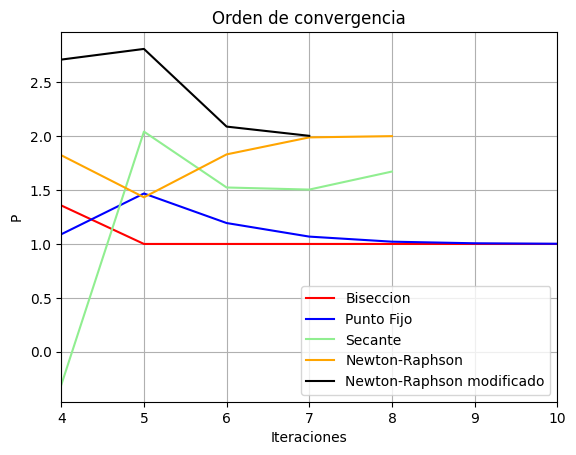

In [ ]:
def calcular_x(vector):
    x=[0]*len(vector)
    for i in range(len(vector)):
        x[i]= i+4
    return x

convergencia_biseccion = calcularOrdenDeConvergencia(historia_biseccion)
convergencia_puntoFijo = calcularOrdenDeConvergencia(historia_puntofijo)
convergencia_secante = calcularOrdenDeConvergencia(historia_secante)
convergencia_newtonRaphson = calcularOrdenDeConvergencia(historia_newton_raphson)
convergencia_newtonRaphsonModificado = calcularOrdenDeConvergencia(historia_newton_raphson_modificado)

# Crear gráfico de líneas
plt.plot(calcular_x(convergencia_biseccion), convergencia_biseccion, label='Biseccion', color="red")
plt.plot(calcular_x(convergencia_puntoFijo), convergencia_puntoFijo, label='Punto Fijo', color="blue")
plt.plot(calcular_x(convergencia_secante), convergencia_secante, label='Secante', color="lightgreen")
plt.plot(calcular_x(convergencia_newtonRaphson), convergencia_newtonRaphson, label='Newton-Raphson', color="orange")
plt.plot(calcular_x(convergencia_newtonRaphsonModificado), convergencia_newtonRaphsonModificado, label='Newton-Raphson modificado', color="black")

plt.xlim(4,10)
plt.xlabel('Iteraciones')
plt.ylabel('P')
plt.title('Orden de convergencia')
plt.grid(True)
plt.legend()
plt.show()

#Gráfico Constante Asintótica

Utilizando la fórmula clásica para el cálculo de la constante asintótica más la información calculada previamente del orden de convergencia por iteración, se puede también generar un gráfico que muestre como cambia la constante asintótica por cada iteración, todas suelen ser menor a 1, con excepción de punto fijo que excede dicho valor por menos de 0.1, probablemente por complicaciones y limitaciones computacionales. Tampoco hay mucha información sobre el método Newton-Raphson modificado por el mismo problema.

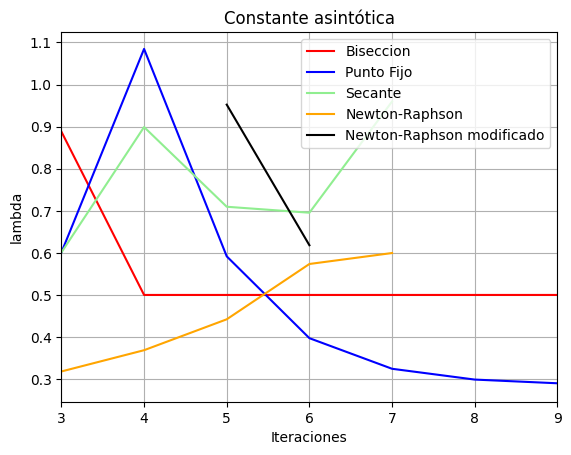

In [ ]:
def calcular_x(vector):
    x=[0]*len(vector)
    for i in range(len(vector)):
        x[i]= i+3
    return x

y_biseccion = calcularConstanteAsintotica(historia_biseccion, convergencia_biseccion)
y_punto_fijo = calcularConstanteAsintotica(historia_puntofijo, convergencia_puntoFijo)
y_secante = calcularConstanteAsintotica(historia_secante, convergencia_secante)
y_nr = calcularConstanteAsintotica(historia_newton_raphson, convergencia_newtonRaphson)
y_nrm = calcularConstanteAsintotica(historia_newton_raphson_modificado, convergencia_newtonRaphsonModificado)

# Crear gráfico de líneas
plt.plot(calcular_x(y_biseccion), y_biseccion, label='Biseccion', color="red")
plt.plot(calcular_x(y_punto_fijo), y_punto_fijo, label='Punto Fijo', color="blue")
plt.plot(calcular_x(y_secante), y_secante, label='Secante', color="lightgreen")
plt.plot(calcular_x(y_nr), y_nr, label='Newton-Raphson', color="orange")
plt.plot([5, 6], y_nrm[2:], label='Newton-Raphson modificado', color="black")

plt.xlim(3,9)
plt.xlabel('Iteraciones')
plt.ylabel('lambda')
plt.title('Constante asintótica')
plt.grid(True)
plt.legend()
plt.show()

# Grafico Δx

Por último un gráfico más sencillo de computar, es simplemente para mostrar gráficamente el error que se suele cometer por cada iteración entre la semilla actual y la anterior.

Como se puede ver, dicho error desciende como una línea recta en ambos métodos lineales (punto fijo y bisección), y toma una forma de parábola en los métodos no lineales.

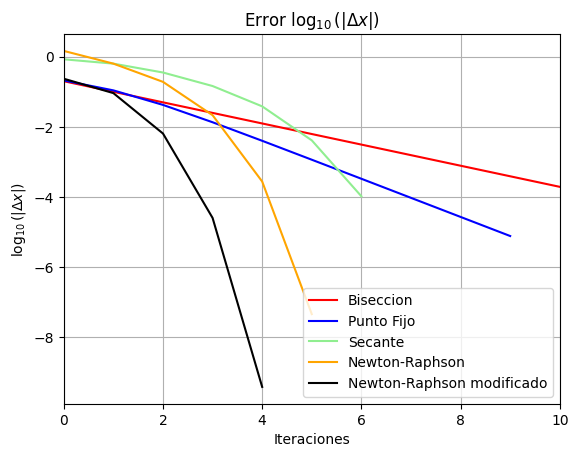

In [ ]:
def calcular_x(vector):
    x=[0]*len(vector)
    for i in range(len(vector)):
        x[i]= i
    return x

y_biseccion = calcular_delta_x(historia_biseccion)
y_punto_fijo = calcular_delta_x(historia_puntofijo)
y_secante = calcular_delta_x(historia_secante)
y_nr = calcular_delta_x(historia_newton_raphson)
y_nrm = calcular_delta_x(historia_newton_raphson_modificado)


# Crear gráfico de líneas
plt.plot(calcular_x(y_biseccion), y_biseccion, label='Biseccion', color="red")
plt.plot(calcular_x(y_punto_fijo), y_punto_fijo, label='Punto Fijo', color="blue")
plt.plot(calcular_x(y_secante), y_secante, label='Secante', color="lightgreen")
plt.plot(calcular_x(y_nr), y_nr, label='Newton-Raphson', color="orange")
plt.plot(calcular_x(y_nrm), y_nrm, label='Newton-Raphson modificado', color="black")

plt.xlim(0,10)
plt.xlabel('Iteraciones')
plt.ylabel(r'$\log_{10}(|\Delta x|)$')
plt.title(r'Error $\log_{10}(|\Delta x|)$')
plt.grid(True)
plt.legend()
plt.show()